<a href="https://colab.research.google.com/github/Arpitabagdawat/Bitcoin-sentiment-analysis/blob/main/Bitcoin_Market_Sentiment_%26_Trading_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [9]:
traders = pd.read_csv("/content/historical_data.csv")
traders.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [10]:
behavior = pd.read_csv("/content/fear_greed_index.csv")
behavior.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [12]:
traders.info()
behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [13]:
print(traders.isnull().sum())
print(behavior.isnull().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [14]:
traders = traders.drop_duplicates()
behavior = behavior.drop_duplicates()

for col in traders.columns:
    if traders[col].dtype == "object":
        traders[col].fillna(traders[col].mode()[0], inplace=True)
    else:
        traders[col].fillna(traders[col].median(), inplace=True)

for col in behavior.columns:
    if behavior[col].dtype == "object":
        behavior[col].fillna(behavior[col].mode()[0], inplace=True)
    else:
        behavior[col].fillna(behavior[col].median(), inplace=True)

/tmp/ipython-input-2642123271.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traders[col].fillna(traders[col].mode()[0], inplace=True)
/tmp/ipython-input-2642123271.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [15]:
traders["Timestamp"] = pd.to_datetime(traders["Timestamp"], errors="coerce")
behavior["date"] = pd.to_datetime(behavior["date"], errors="coerce")

In [16]:
merged = pd.merge(behavior, traders, left_on="date", right_on="Timestamp", how="left")
merged.head()

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,1517463000,30,Fear,2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1517549400,15,Extreme Fear,2018-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1517635800,40,Fear,2018-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1517722200,24,Extreme Fear,2018-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1517808600,11,Extreme Fear,2018-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


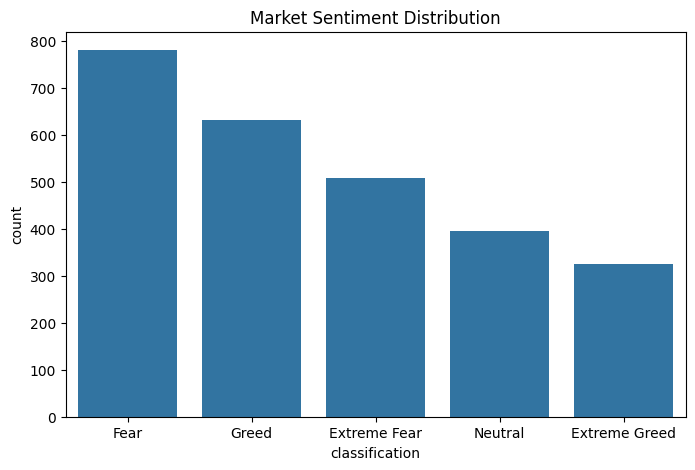

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x="classification", data=behavior, order=behavior["classification"].value_counts().index)
plt.title("Market Sentiment Distribution")
plt.show()

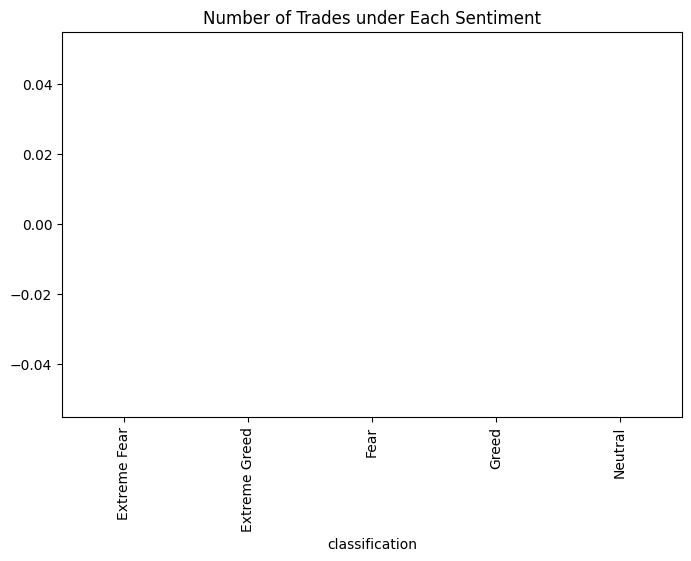

In [19]:
sentiment_trade = merged.groupby("classification")["Execution Price"].count()
sentiment_trade.plot(kind="bar", figsize=(8,5))
plt.title("Number of Trades under Each Sentiment")
plt.show()

In [21]:
# Cell 10: Insights
print(" Top Sentiment Days:\n", behavior["classification"].value_counts().head())
print(" Trading Volume by Sentiment:\n", sentiment_trade)

 Top Sentiment Days:
 classification
Fear             781
Greed            633
Extreme Fear     508
Neutral          396
Extreme Greed    326
Name: count, dtype: int64
 Trading Volume by Sentiment:
 classification
Extreme Fear     0
Extreme Greed    0
Fear             0
Greed            0
Neutral          0
Name: Execution Price, dtype: int64
